In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
import cmocean

%config InlineBackend.figure_format = 'svg'

In [2]:
from pyReef.model import Model 

# Initialise model

In [3]:
# initialise model
reef = Model()

In [4]:
# Define the XmL input file
reef.load_xml('input.xml')

### Visualise surface parameters 

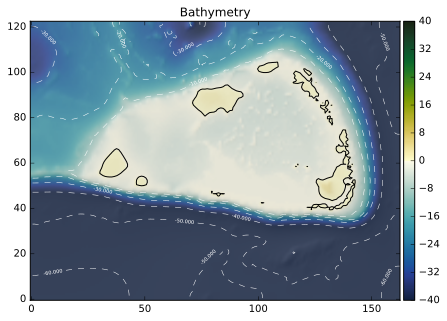

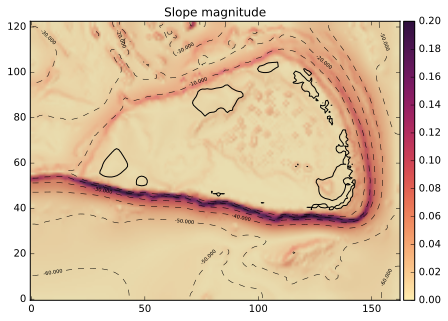

In [5]:
reef.mPlot.paramInit(z=reef.pyGrid.regZ, sl=reef.force.sealevel)
reef.mPlot.bathymetry(color=cmocean.cm.delta, fsize=(7.5,5), fname='bathy.png', dpi=300)
reef.mPlot.slope(color=cmocean.cm.matter, fsize=(7.5,5), fname='slope.png', dpi=300)

# Run model

We run the model for a given time period 

In [6]:
# Run model
reef.run_to_time(0.5)

-----------------
Hydrodynamics: waves field 0 and climatic conditions 0:
   -   Wave propagation took 4.92 seconds to run.
   -   Currents model took 0.87 seconds to run.
   -   Morphological change took 7.68 seconds to run.


In [7]:
print 'Check mass balance: ',numpy.sum(reef.hydro.dh[0])

Check mass balance:  -3.19768199759e-05


### Visualise deposition rate based on Soulsby - Van Rijn formulation

-0.404134583375 1.67570046238


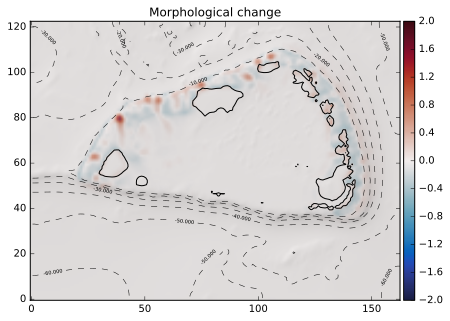

In [8]:
vmin = -2
vmax = 2
rr = reef.hydro.dh[0]
print rr.min(),rr.max()
reef.mPlot.morphochange(rr, min=vmin, max=vmax, gauss=0, 
                      color=cmocean.cm.balance, fsize=(7.5,5), 
                      fname='deposition.png', dpi=300)

### Bedload

0.0 0.459449935116


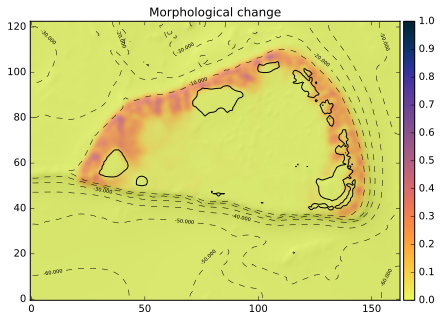

In [9]:
rr = reef.hydro.bedl[0]
vmin = 0
vmax = 1.
print rr.min(),rr.max()
reef.mPlot.morphochange(rr, min=vmin, max=vmax, gauss=0, 
                      color=cmocean.cm.thermal_r, fsize=(7.5,5), 
                      fname='deposition.png', dpi=300)

### Suspended load

0.0 1.72026225111


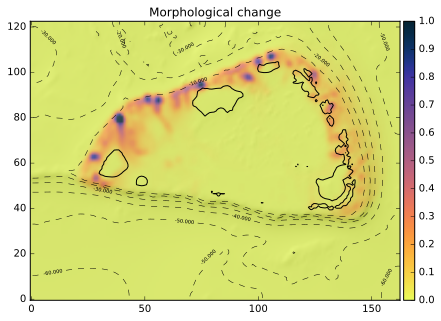

In [10]:
rr = reef.hydro.suspl[0]
vmin = 0
vmax = 1.
print rr.min(),rr.max()
reef.mPlot.morphochange(rr, min=vmin, max=vmax, gauss=0, 
                      color=cmocean.cm.thermal_r, fsize=(7.5,5), 
                      fname='deposition.png', dpi=300)

In [ ]:
reef.mPlot.bathymetry(color=cmocean.cm.delta, fsize=(7.5,5), fname='bathy1.png', dpi=300)

### Visualise SWAN outputs

In [ ]:
hght = reef.force.wavH[0]
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
reef.mPlot.waveHeight(height=hght, lvls=levels, color=cmocean.cm.thermal, fsize=(7.5,5), fname='height.png', dpi=300)
U = reef.force.wavU[0].T
V = reef.force.wavV[0].T
reef.mPlot.bottomCurrents(U, V, gauss=1., dens=3, color=cmocean.cm.deep, fsize=(7.5,5), fname='currents.png', dpi=300)

In [ ]:
import numpy
hght = numpy.sqrt(reef.force.wavU[0]**2+reef.force.wavV[0]**2) #reef.force.wavU[0]
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
reef.mPlot.waveHeight(height=hght, lvls=levels, color=cmocean.cm.thermal, fsize=(7.5,5), fname='height.png', dpi=300)

# Run next time step

In [ ]:
# Run model
reef.run_to_time(1.)

In [ ]:
hght = reef.force.wavH[0]
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
reef.mPlot.waveHeight(height=hght, lvls=levels, color=cmocean.cm.thermal, fsize=(7.5,5), fname='height.png', dpi=300)

U = reef.force.wavU[0].T
V = reef.force.wavV[0].T
reef.mPlot.bottomCurrents(U, V, gauss=3., dens=1, color=cmocean.cm.deep, fsize=(7.5,5), fname='currents.png', dpi=300)

# Run in parallel

In [ ]:
!mpiexec -n 1 python mpi_example.py 0.5

In [ ]:
!mpiexec -n 2 python mpi_example.py 0.5

In [ ]:
!mpiexec -n 3 python mpi_example.py 0.5